In [1]:
import sys
import argparse

import matplotlib.pyplot as plt
import pickle

import numpy as np
import pandas as pd

import glob

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [2]:
PATH_data = '../results/clean_vs_dirty/'

In [3]:
samples_path = glob.glob(f'{PATH_data}/*')

In [23]:
# res_dict = {}
c = 0

labels = []
x_pos = []

x_pos1 = []
y_roc_norm = []
y_pr_norm = []
dots_roc_norm = []
dots_pr_norm = []

x_pos2 = []
y_roc_no_aug = []
y_pr_no_aug = []
dots_roc_no_aug = []
dots_pr_no_aug = []


prop = []
prop2 = []

for sample in samples_path:
    
    x_pos.append(c)
    x_pos1.append(c-0.2)
    x_pos2.append(c+0.2)
    
    
    tissue_name = sample.split('/')[-1]
    labels.append(tissue_name)
#     res_dict[tissue_name]=[[],[]]

    sub_samples_path = glob.glob(f'{sample}/*')
    print()
    print (tissue_name)
    
    for sub_folder in sub_samples_path:
        
        sample_name = sub_folder.split('/')[-1]
        df_metrics = pd.read_csv(f'{sub_folder}/results/{sample_name}_metrics.csv', index_col=0)
#         print (df_metrics)
#         print (sample_name)
        if 'noTEST' in sample_name:
            y_pr_no_aug.append(df_metrics.loc['all','auPR'])
            dots_pr_no_aug.append(list(df_metrics.iloc[0:5,3]))
            y_roc_no_aug.append(df_metrics.loc['all','auROC'])
            dots_roc_no_aug.append(list(df_metrics.iloc[0:5,2]))         
            print ('noTEST',df_metrics.loc['all','auPR'])
            
            with open(f'{sub_folder}/results/{sample_name}_real.pk', 'rb') as real_pi:
                    reals = pickle.load(real_pi)

                    prop2.append(round(list(reals[0]).count(1)/list(reals[0]).count(0),2))
            

        if 'noTEST' not in sample_name:
            y_pr_norm.append(df_metrics.loc['all','auPR'])
            dots_pr_norm.append(list(df_metrics.iloc[0:5,3]))
            y_roc_norm.append(df_metrics.loc['all','auROC'])
            dots_roc_norm.append(list(df_metrics.iloc[0:5,2]))
#             print (sample_name, 'norm')
            print ('all',df_metrics.loc['all','auPR'])
        
            with open(f'{sub_folder}/results/{sample_name}_real.pk', 'rb') as real_pi:
                    reals = pickle.load(real_pi)

                    prop.append(round(list(reals[0]).count(1)/list(reals[0]).count(0),2))
    
    
    
    c += 1

# prop2 = prop[1::3]
# prop2 = prop[1::2]
labels_formatted = [x.replace('_','\n') for x in labels]
    
# print(labels)
# print(x_pos)
# print(y_pr)
# print(y_roc)
# print(dots_roc)
# print(dots_pr)  
# print(prop)
        
    


Skin
all 0.204
noTEST 0.24100000000000002

Large_Intestine
noTEST 0.09300000000000001
all 0.107

Central_Nervous_System
all 0.327
noTEST 0.35100000000000003

Lung
all 0.251
noTEST 0.214

Breast
noTEST 0.135
all 0.126

Kidney
noTEST 0.10300000000000001
all 0.099

Esophagus
all 0.079
noTEST 0.085

Bone
noTEST 0.052000000000000005
all 0.051

Head_and_Neck
all 0.127
noTEST 0.062

Stomach
noTEST 0.017
all 0.042

Peripheral_Nervous_System
noTEST 0.047
all 0.10300000000000001

Haematopoietic_and_Lymphoid
noTEST 0.7659999999999999
all 0.736

Pancreas
noTEST 0.10300000000000001
all 0.053

Ovary
noTEST 0.07400000000000001
all 0.08900000000000001


In [20]:
len(prop)

14

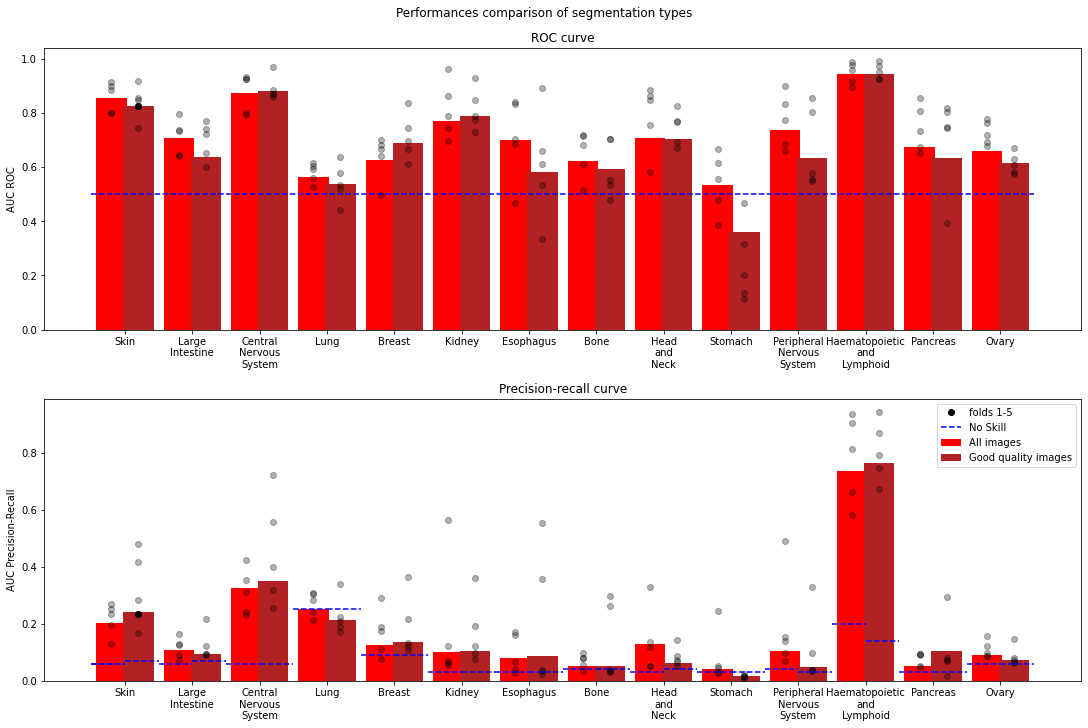

In [25]:
rotation = 0
width = 0.45
alpha = 0.3

fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(15,10), constrained_layout=True,)

_ = fig.suptitle(f'Performances comparison of segmentation types')

_ = ax1.set_title('ROC curve')
# _ = ax1.set_xlabel('Tissue')
_ = ax1.set_ylabel('AUC ROC')


_ = ax1.bar(x_pos1, y_roc_norm, width=width, label="All images", color = 'red')
_ = ax1.plot(x_pos1, dots_roc_norm, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax1.bar(x_pos2, y_roc_no_aug, width=width, label="Good quality images", color = 'firebrick')
_ = ax1.plot(x_pos2, dots_roc_no_aug, linestyle='none', marker='o', color='black', alpha=alpha)





_ = ax1.plot(x_pos2[0], dots_roc_no_aug[0][0], linestyle='none', marker='o', color='black', label="folds 1-5")

_ = ax1.plot([min(x_pos)-0.5, max(x_pos)+0.5], [0.5, 0.5], label = 'No Skill', linestyle='--', color = 'blue')
_ = ax1.set_xticks(x_pos)
_ = ax1.set_xticklabels(labels_formatted, rotation=rotation)
# _ = ax1.legend()



_ = ax2.set_title('Precision-recall curve')
# _ = ax2.set_xlabel('Tissue')
_ = ax2.set_ylabel('AUC Precision-Recall')

_ = ax2.bar(x_pos1, y_pr_norm, width=width, label="All images", color = 'red')
_ = ax2.plot(x_pos1, dots_pr_norm, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax2.bar(x_pos2, y_pr_no_aug, width=width, label="Good quality images", color = 'firebrick')
_ = ax2.plot(x_pos2, dots_pr_no_aug, linestyle='none', marker='o', color='black', alpha=alpha)





_ = ax2.plot(x_pos2[0], dots_pr_no_aug[0][0], linestyle='none', marker='o', color='black', label="folds 1-5")


for i in range(len(x_pos)):
    _ = ax2.plot([x_pos[i]-0.5,x_pos[i]],[prop[i],prop[i]], linestyle='--', color = 'blue')
    
_ = ax2.plot([x_pos[0]-0.5,x_pos[0]],[prop[0],prop[0]], label = 'No Skill', linestyle='--', color = 'blue')

for i in range(len(x_pos)):
    _ = ax2.plot([x_pos[i],x_pos[i]+0.5],[prop2[i],prop2[i]], linestyle='--', color = 'blue')
    
# _ = ax2.plot([x_pos[0]-0.5,x_pos[0]+0.5],[prop2[0],prop2[0]], label = 'No Skill', linestyle='--', color = 'blue')
_ = ax2.set_xticks(x_pos)
_ = ax2.set_xticklabels(labels_formatted, rotation=rotation)
_ = ax2.legend()


plt.savefig(f'Performances_comparison_clean_vs_dirty.png')